In [1]:
from utils import plot_similarity_histogram, get_tanimoto_similarity_triangle, plot_histogram_with_two_y_axes, get_actives_inactives_similarity_flat, scaffold_dataset_splitter
import pandas as pd

2024-09-25 13:17:01.341624: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-25 13:17:01.397745: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-25 13:17:01.397797: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-25 13:17:01.399531: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-25 13:17:01.408802: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-25 13:17:01.409547: I tensorflow/core/platform/cpu_feature_guard.cc:1

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


# Dataset filtrado general

In [2]:
df = pd.read_pickle("../data/raw/data_chembl34_filtrada_02_09_24.pkl")

# Armado de dataset


In [3]:
target = "CHEMBL262"
df_target = df[df.target == target]
df_target

,molregno,comp_id,tid,assay_id,target,relation,bioactivity,units,type,potential_duplicate,...,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,np_likeness_score,sequence,sequence_organism,binary_bioactivity
18,250,CHEMBL10,10197,586329,CHEMBL262,=,1700.0,nM,Kd,0,...,0.53,377.0998,C21H16FN3OS,4.0,1.0,0.0,-0.92,MSGRPRTTSFAESCKPVQQPSAFGSMKVSRDKDGSKVTTVVATPGQ...,Homo sapiens,1
334,161330,CHEMBL100309,10197,71150,CHEMBL262,=,1999.86,nM,IC50,0,...,0.55,393.9929,C17H10BrF3N2O,3.0,2.0,1.0,-0.59,MSGRPRTTSFAESCKPVQQPSAFGSMKVSRDKDGSKVTTVVATPGQ...,Homo sapiens,1
338,161672,CHEMBL100312,10197,71150,CHEMBL262,=,2301.44,nM,IC50,0,...,0.53,426.0579,C21H19BrN2O3,5.0,1.0,1.0,-0.41,MSGRPRTTSFAESCKPVQQPSAFGSMKVSRDKDGSKVTTVVATPGQ...,Homo sapiens,1
1070,166984,CHEMBL101035,10197,2081050,CHEMBL262,>,50000.0,nM,IC50,0,...,0.51,477.2740,C27H35N5O3,8.0,2.0,0.0,-2.00,MSGRPRTTSFAESCKPVQQPSAFGSMKVSRDKDGSKVTTVVATPGQ...,Homo sapiens,0
2037,169995,CHEMBL101804,10197,466615,CHEMBL262,=,141.0,nM,IC50,0,...,0.76,268.0960,C14H12N4O2,6.0,2.0,0.0,-1.96,MSGRPRTTSFAESCKPVQQPSAFGSMKVSRDKDGSKVTTVVATPGQ...,Homo sapiens,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284861,160386,CHEMBL99203,10197,1972137,CHEMBL262,>,50000.0,nM,IC50,0,...,0.49,391.9982,C11H13IN4O4,8.0,5.0,0.0,0.94,MSGRPRTTSFAESCKPVQQPSAFGSMKVSRDKDGSKVTTVVATPGQ...,Homo sapiens,0
1284912,161956,CHEMBL99280,10197,593419,CHEMBL262,=,4000.0,nM,IC50,0,...,0.65,366.0368,C19H15BrN2O,3.0,1.0,0.0,-0.54,MSGRPRTTSFAESCKPVQQPSAFGSMKVSRDKDGSKVTTVVATPGQ...,Homo sapiens,1
1285024,161777,CHEMBL99423,10197,71150,CHEMBL262,=,139979.365,nM,IC50,0,...,0.72,278.1055,C17H14N2O2,4.0,2.0,0.0,0.17,MSGRPRTTSFAESCKPVQQPSAFGSMKVSRDKDGSKVTTVVATPGQ...,Homo sapiens,0
1285394,161939,CHEMBL99779,10197,71150,CHEMBL262,=,10000.0,nM,IC50,0,...,0.45,416.0524,C23H17BrN2O,3.0,1.0,1.0,-0.64,MSGRPRTTSFAESCKPVQQPSAFGSMKVSRDKDGSKVTTVVATPGQ...,Homo sapiens,1


In [4]:
df_target[df_target.duplicated(subset="comp_id")]

,molregno,comp_id,tid,assay_id,target,relation,bioactivity,units,type,potential_duplicate,...,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,np_likeness_score,sequence,sequence_organism,binary_bioactivity


# Estudio de diversidad quimica de compuestos

100%|██████████| 3451/3451 [01:24<00:00, 41.08it/s] 


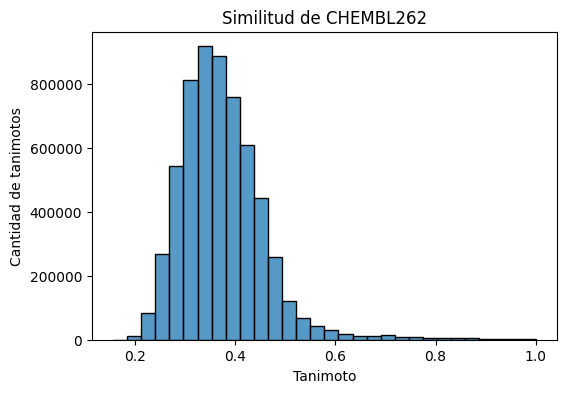

In [5]:
similarity_triangle = get_tanimoto_similarity_triangle(df_target)
plot_similarity_histogram(similarity_triangle,target)

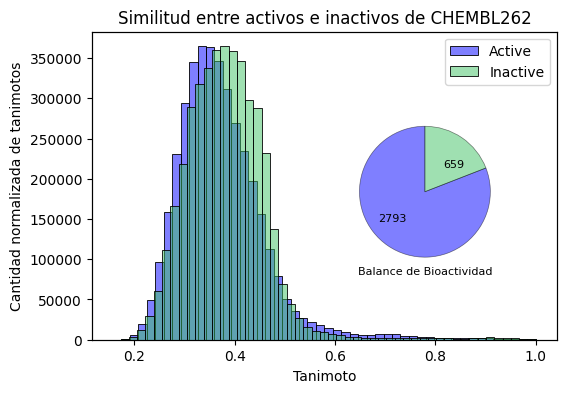

In [6]:
actives, inactives = get_actives_inactives_similarity_flat(df_target, similarity_triangle)

plot_histogram_with_two_y_axes(actives,inactives,df_target,target)

In [7]:
df_target

,molregno,comp_id,tid,assay_id,target,relation,bioactivity,units,type,potential_duplicate,...,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,np_likeness_score,sequence,sequence_organism,binary_bioactivity
18,250,CHEMBL10,10197,586329,CHEMBL262,=,1700.0,nM,Kd,0,...,0.53,377.0998,C21H16FN3OS,4.0,1.0,0.0,-0.92,MSGRPRTTSFAESCKPVQQPSAFGSMKVSRDKDGSKVTTVVATPGQ...,Homo sapiens,1
334,161330,CHEMBL100309,10197,71150,CHEMBL262,=,1999.86,nM,IC50,0,...,0.55,393.9929,C17H10BrF3N2O,3.0,2.0,1.0,-0.59,MSGRPRTTSFAESCKPVQQPSAFGSMKVSRDKDGSKVTTVVATPGQ...,Homo sapiens,1
338,161672,CHEMBL100312,10197,71150,CHEMBL262,=,2301.44,nM,IC50,0,...,0.53,426.0579,C21H19BrN2O3,5.0,1.0,1.0,-0.41,MSGRPRTTSFAESCKPVQQPSAFGSMKVSRDKDGSKVTTVVATPGQ...,Homo sapiens,1
1070,166984,CHEMBL101035,10197,2081050,CHEMBL262,>,50000.0,nM,IC50,0,...,0.51,477.2740,C27H35N5O3,8.0,2.0,0.0,-2.00,MSGRPRTTSFAESCKPVQQPSAFGSMKVSRDKDGSKVTTVVATPGQ...,Homo sapiens,0
2037,169995,CHEMBL101804,10197,466615,CHEMBL262,=,141.0,nM,IC50,0,...,0.76,268.0960,C14H12N4O2,6.0,2.0,0.0,-1.96,MSGRPRTTSFAESCKPVQQPSAFGSMKVSRDKDGSKVTTVVATPGQ...,Homo sapiens,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284861,160386,CHEMBL99203,10197,1972137,CHEMBL262,>,50000.0,nM,IC50,0,...,0.49,391.9982,C11H13IN4O4,8.0,5.0,0.0,0.94,MSGRPRTTSFAESCKPVQQPSAFGSMKVSRDKDGSKVTTVVATPGQ...,Homo sapiens,0
1284912,161956,CHEMBL99280,10197,593419,CHEMBL262,=,4000.0,nM,IC50,0,...,0.65,366.0368,C19H15BrN2O,3.0,1.0,0.0,-0.54,MSGRPRTTSFAESCKPVQQPSAFGSMKVSRDKDGSKVTTVVATPGQ...,Homo sapiens,1
1285024,161777,CHEMBL99423,10197,71150,CHEMBL262,=,139979.365,nM,IC50,0,...,0.72,278.1055,C17H14N2O2,4.0,2.0,0.0,0.17,MSGRPRTTSFAESCKPVQQPSAFGSMKVSRDKDGSKVTTVVATPGQ...,Homo sapiens,0
1285394,161939,CHEMBL99779,10197,71150,CHEMBL262,=,10000.0,nM,IC50,0,...,0.45,416.0524,C23H17BrN2O,3.0,1.0,1.0,-0.64,MSGRPRTTSFAESCKPVQQPSAFGSMKVSRDKDGSKVTTVVATPGQ...,Homo sapiens,1


In [8]:
proportions_df

NameError: name 'proportions_df' is not defined

splitting

In [ ]:
dataset_splited = scaffold_dataset_splitter(df_target)

dataset_splited.to_csv(f"../data/processed/{target}_chemblv34.csv",index=False)